<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-d462c4460fe3>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

## Median value of owner-occupied homes

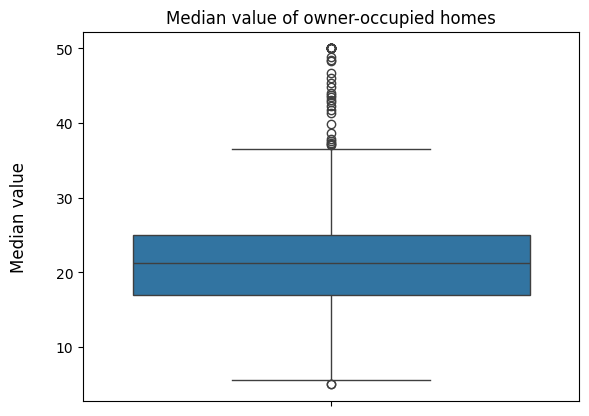

In [7]:
value = sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')
value.set_xlabel("", labelpad=20, size=12)
value.set_ylabel("Median value", labelpad=20, size=12)
plt.show()

**Explanation:** The median value is close to 21 and most of outliers are in the upper part of the boxplot. The maximum value thats not an outlier is close to 36 and the maximum value of an outlier is 50.

## Is there a significant difference in median value of houses bounded by the Charles river or not?

### Hypothesis:
*   $H\_0: µ\_1 = µ\_2$ (There is no difference in median value of houses bounded by the Charles river)
*   $H\_1: µ\_1 ≠ µ\_2$ (There is a difference in median value of houses bounded by the Charles river)

In [7]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == True]['MEDV'],
                   boston_df[boston_df['CHAS'] == False]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

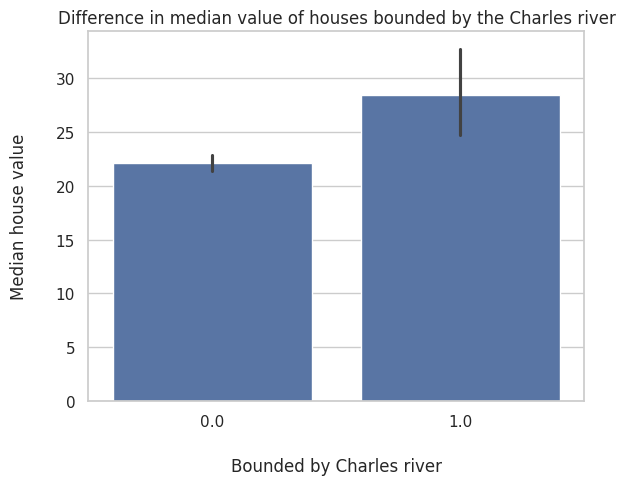

In [61]:
sns.set(style="whitegrid")
river_value = sns.barplot(x="CHAS", y="MEDV", data=boston_df)
plt.title('Difference in median value of houses bounded by the Charles river')
river_value.set_xlabel("Bounded by Charles river", labelpad=20, size=12)
river_value.set_ylabel("Median house value", labelpad=20, size=12)
plt.show()

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in median values of houses bounded by the Charles river and houses not bounded by the river.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

### Hypothesis:

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (The three population means are equal)
*   $H\_1:$ (At least one of the means differ)

In [15]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'Less than 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35-70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'

In [16]:
thirtyfive_lower = boston_df[boston_df['age_group'] == 'Less than 35']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'Between 35-70']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [17]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


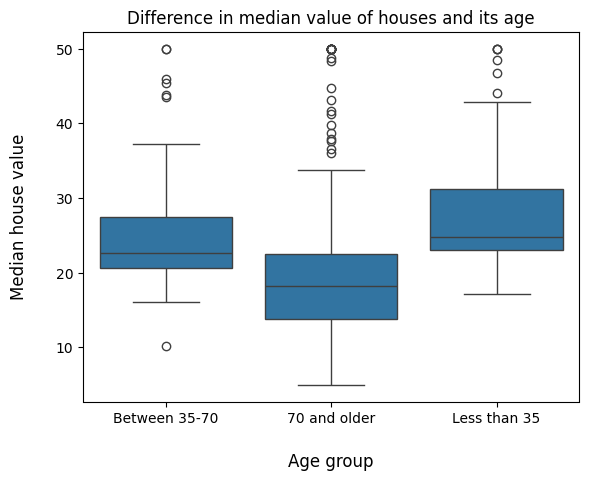

In [18]:
age_value = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Difference in median value of houses and its age')
age_value.set_xlabel("Age group", labelpad=20, size=12)
age_value.set_ylabel("Median house value", labelpad=20, size=12)
plt.show()

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference between the median value of a house and its age.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

## Hypothesis:

*   $H\_0:$ (Nitric oxide concentration is not correlated with proportion of non-retail business acres per town)
*   $H\_1:$ (Nitric oxide concentration is correlated with proportion of non-retail business acres per town)

In [28]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

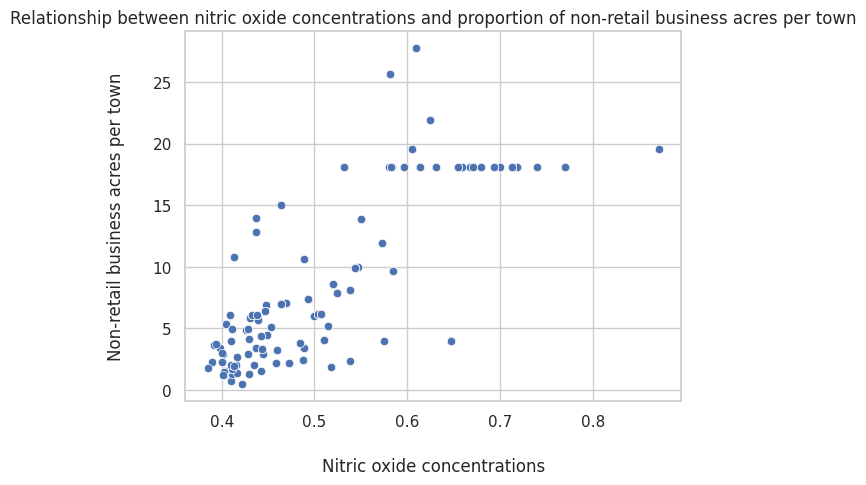

In [55]:
oxide_business = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between nitric oxide concentrations and proportion of non-retail business acres per town')
oxide_business.set_xlabel("Nitric oxide concentrations", labelpad=20, size=12)
oxide_business.set_ylabel("Non-retail business acres per town", labelpad=20, size=12)
plt.show()

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a correlation between nitric oxide concentrations and proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

## Hypothesis:

*   $H\_0: β1$ = 0 (Weighted distance to the five Boston employment centres has no effect on median value of owner occupied homes)
*   $H\_1: β1$ ≠ 0 (Weighted distance to the five Boston employment centres has an effect on median value of owner occupied homess)

In [30]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        10:35:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The coefficient is 1.0916, which means that an addition in the weigthed distance to the five employment centers adds on average 1.0916 to the median house value. The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that an additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes.

## Pupil to teacher ratio

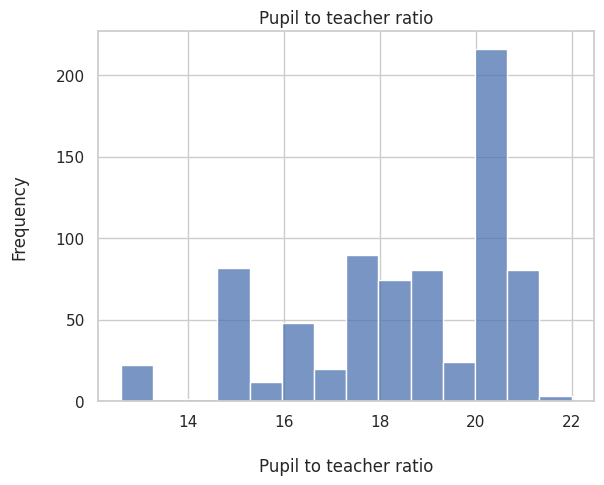

In [60]:
pratio= sns.histplot(x='PTRATIO', stat='frequency', data=boston_df)
plt.title('Pupil to teacher ratio')
pratio.set_xlabel("Pupil to teacher ratio", labelpad=20, size=12)
pratio.set_ylabel("Frequency", labelpad=20, size=12)
plt.show()

**Explanation:** The ratio is close to 21%, and the ratios are in between 13% and 22%.